In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [8]:
df.drop(105,axis=0,inplace=True)

In [9]:
df.drop(106,axis=0,inplace=True)

In [10]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [11]:
df.columns = ['Month','Sales per Month']

In [29]:
df

,Sales per Month,forecast
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
...,...,...
1972-05-01,4618.0,4683.966470
1972-06-01,5312.0,4748.832374
1972-07-01,4298.0,4391.913892


In [13]:
df['Month']=pd.to_datetime(df['Month'])

In [14]:
df.head()

,Month,Sales per Month
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [16]:
df.set_index('Month',inplace=True)

In [17]:
df.head()

,Sales per Month
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


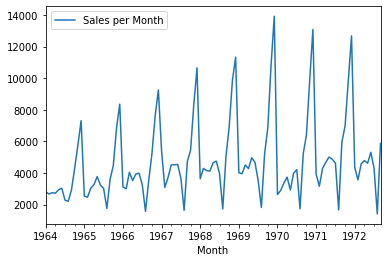

In [18]:
df.plot()

In [19]:
model = sm.tsa.statespace.SARIMAX(df['Sales per Month'],order=(1,0,0),seasonal_order=(1,1,1,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [20]:
results = model.fit()

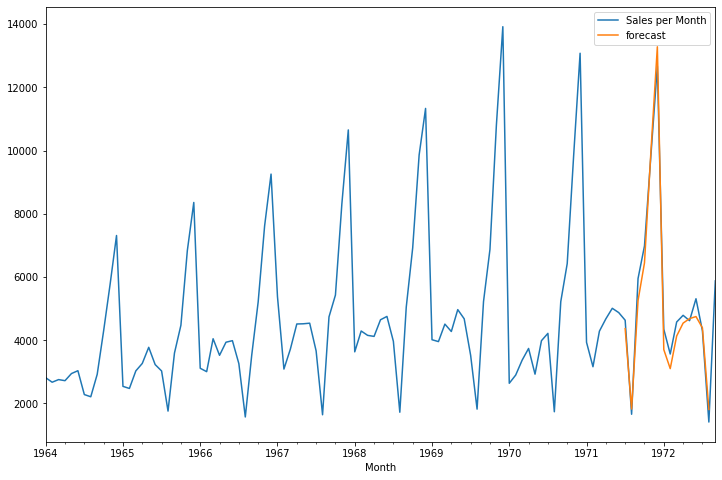

In [31]:
df['forecast'] = results.predict(start=90,end=103,dynamic=True)
df[['Sales per Month','forecast']].plot(figsize=(12,8))

In [33]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [34]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [35]:
future_dates_df

,Sales per Month,forecast
1972-10-01,NaN,NaN
1972-11-01,NaN,NaN
1972-12-01,NaN,NaN
1973-01-01,NaN,NaN
1973-02-01,NaN,NaN
1973-03-01,NaN,NaN
1973-04-01,NaN,NaN
1973-05-01,NaN,NaN
1973-06-01,NaN,NaN
1973-07-01,NaN,NaN


In [36]:
future_df = pd.concat([df,future_dates_df])

In [37]:
future_df

,Sales per Month,forecast
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
...,...,...
1974-04-01,NaN,NaN
1974-05-01,NaN,NaN
1974-06-01,NaN,NaN
1974-07-01,NaN,NaN


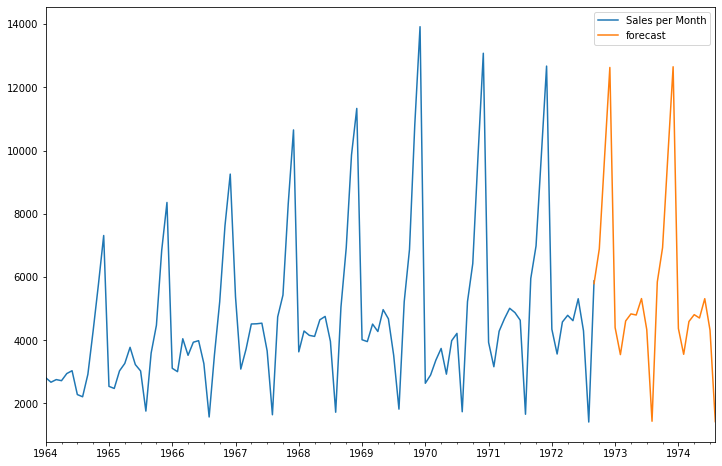

In [39]:
future_df['forecast'] = results.predict(start = 104,end=150,dynamic=True)
future_df[['Sales per Month','forecast']].plot(figsize=(12,8))